In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



Import used module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import shutil
import tqdm
import cv2

Preview train dataset

In [2]:
sample_label=pd.read_csv(r'/project/lt900038-ai23tn/frb_data/train/B0531+21_2020-05-31-11_36_46_0001023_labels.csv')
sample_label

,Unnamed: 0,index,labels
0,0,0,None
1,1,1,None
2,2,2,None
3,3,3,None
4,4,4,None
...,...,...,...
1019,1019,1019,None
1020,1020,1020,None
1021,1021,1021,None
1022,1022,1022,None


In [3]:
sample_label['labels'].value_counts()

None           933
Broad           80
Pulse            9
Broad+Pulse      2
Name: labels, dtype: int64

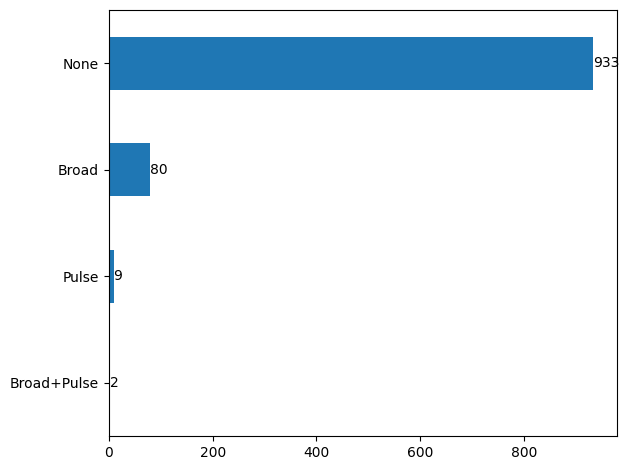

In [4]:
ax=sample_label['labels'].value_counts().sort_values().plot(kind='barh')
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

In [10]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import glob

In [6]:
path = Path("/lustrefs/disk/project/lt900038-ai23tn/frb_data/train")
npy_files = sorted(list(path.glob('*.npy')))
csv_files = sorted(list(path.glob('*.csv')))
num = 91
sample_train = np.load(npy_files[num])
data = pd.read_csv(csv_files[num])
print(sample_train.shape)
print(data)

(262144, 256)
      Unnamed: 0  index  labels
0              0      0    None
1              1      1    None
2              2      2    None
3              3      3    None
4              4      4    None
...          ...    ...     ...
1019        1019   1019  Narrow
1020        1020   1020  Narrow
1021        1021   1021  Narrow
1022        1022   1022  Narrow
1023        1023   1023  Narrow

[1024 rows x 3 columns]


In [7]:
norm_train = (sample_train-sample_train.min())/(sample_train.max()-sample_train.min())
split_norm_train = np.copy(norm_train).reshape(sample_label.shape[0],-1,256)

222


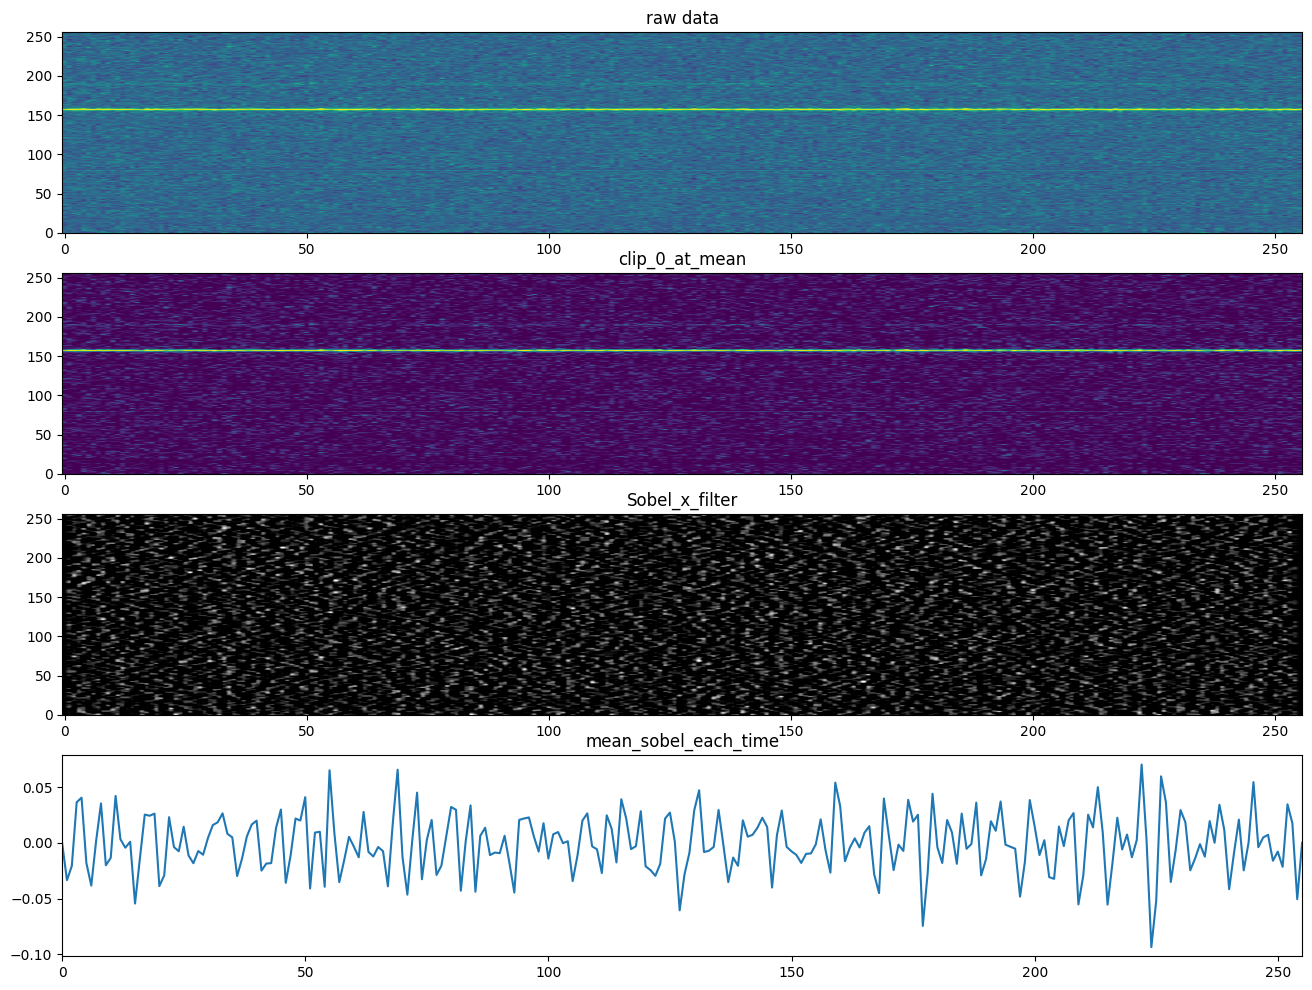

In [9]:
fig,ax=plt.subplots(4,1,figsize=(16,12))
ax0 = ax[0].imshow(split_norm_train[842,:,:].T,aspect='auto',origin='lower',vmax=1,vmin=0)
# plt.colorbar(ax0,fraction=0.05,aspect=8,pad=0.02)
ax[0].set_title('raw data')
pre_data = np.copy(split_norm_train[842,:,:].T)


ax[1].set_title('clip_0_at_mean')
copy_pre_data = np.copy(pre_data)
clip_img  = np.clip(copy_pre_data,copy_pre_data.mean(),copy_pre_data.max())
clip_img = (clip_img-clip_img.min())/(clip_img.max()-clip_img.min())
ax1 = ax[1].imshow(clip_img,aspect='auto',origin='lower',vmax=1,vmin=0)
# plt.colorbar(ax1,fraction=0.05,aspect=8,pad=0.02)


ax[2].set_title('Sobel_x_filter')
sobelx = cv2.Sobel(pre_data,cv2.CV_64F,1,0,ksize=3)
ax2 = ax[2].imshow(sobelx,aspect='auto',origin='lower',vmax=1,vmin=0,cmap='gray')
# plt.colorbar(ax2,fraction=0.05,aspect=8,pad=0.02)

# ax[3].set_title('Sobel_x_filter')
# sobelx = cv2.Sobel(sobelx,cv2.CV_64F,1,0,ksize=1)
# ax3 = ax[3].imshow(sobelx,aspect='auto',origin='lower',vmax=1,vmin=0,cmap='gray')
# plt.colorbar(ax3,fraction=0.05,aspect=8,pad=0.02)

# ax[3].set_title('Thresholding')
# copy_sobelx = (np.copy(sobelx)*255).astype('uint8')
# print(copy_sobelx.max())
# thresh,thresh_img = cv2.threshold(copy_sobelx,250,255,cv2.THRESH_BINARY)
# print(thresh)
# copy_sobelx = copy_sobelx[copy_sobelx<250]==0
# ax3 = ax[3].imshow(copy_sobelx,aspect='auto',origin='lower',vmax=255,vmin=0,cmap='gray')
# plt.colorbar(ax3,fraction=0.05,aspect=8,pad=0.02)

ax[3].set_title('mean_sobel_each_time')
mean_pre_data = np.copy(sobelx).mean(axis=0)
ax[3].plot(mean_pre_data)
ax[3].set_xlim([0,255])
print(np.argmax(mean_pre_data))


# ax[4].set_title('Moving average')
# copy_mean_pre = np.copy(mean_pre_data)
# window_slide = np.lib.stride_tricks.sliding_window_view(copy_mean_pre,16)
# ptp_window = np.mean(window_slide,axis=1)
# ax[4].set_xlim([0,255])
# ax[4].plot(ptp_window)

fig.show()

In [ ]:
print((sobelx*255).astype('uint8').max())
print(copy_sobelx.max())
print(sobelx.dtype)

255
0
float64
